In [27]:

# get directory
import os
os.getcwd( )

'/Users/davidchung/Documents/Capstone project'

In [28]:
os.chdir('/Users/davidchung/Documents/Capstone project')
path = os.getcwd()
path

'/Users/davidchung/Documents/Capstone project'

# Classification of Spam emails using Machine Learning

## Problem statement
Classifying spam emails is an interesting topic because it could help sort emails more acurately and could show which machine learing algorithm is the best for projects like this. Often times, spam emails are not sent into the spam inbox and ocasionaly regular email are sent to the spam inbox. My programm would hopefully help solve this problem for people.


## Data
The data set I used was on kaggle as a cvs file. It had over five-thousand message labeled as as spam or not spam and most of the projects on kaggle that I looked at used that data set with acurate results, so I followed suite and imported that data set into Jupiter Notebook. The only problem was unbalanced data, which might have affected my results

## Approach
For my aproach, I wanted test three different machine learning algorithms: MultinomialNB, Logistic Regression, and Random Forest.
I originaly tried Multinomial NB, but it always predicted a regular message, which might be caused by the unbalanced data set, so then I tried random forest with much better results. When I tested random forest's acuracy I got around 97% acuracy, 90% recall, and 98% precision, which is really high.

Supervised learning models are models that are trained by labeled data to predict future outcomes, which is what I trained to predict whether a message is 'ham' or spam.

## Deliverables
Code: data visualization, exploratory data analysis, machine learning algorithms, predicted and classified emails between spam and 'ham'. 

In [29]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load Through Url and Cleaning
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
attributes = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
url_data = pd.read_csv(url, names = attributes)
url_data.columns = attributes
url_data.head()

In [30]:
raw_data = pd.read_csv('data/spam.csv')
raw_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
raw_data.shape

(5572, 2)

# EDA: Exploratory Data Analysis

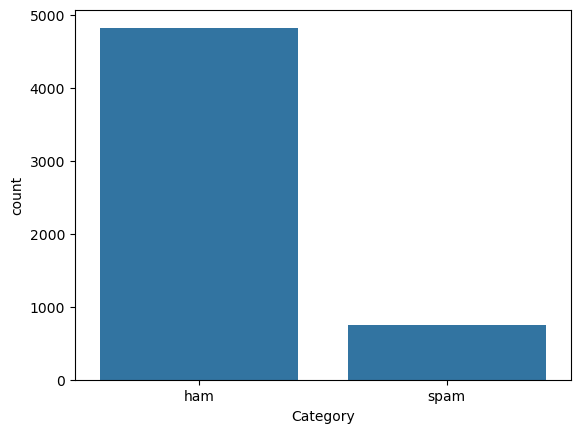

In [32]:
sns.countplot(raw_data, x="Category")
plt.show()

In [33]:
def map_function (df, column_name, new_column_name):
    keys = df[column_name].unique()
    values = [i for i in range(len(keys))]
    y_dict = dict(zip(keys, values))
    df[new_column_name] = df[column_name].map(y_dict)
    return df

In [34]:
processed_df = map_function(raw_data, 'Category', 'Category_labels')
processed_df.head()

,Category,Message,Category_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


# Approach to Analysis


In [35]:
x = processed_df['Message']
y = processed_df['Category_labels']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

In [36]:
vectorizer = TfidfVectorizer(stop_words='english')
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

# Analysis
## MultinomialNB

In [37]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train_tfidf, y_train)

MultinomialNB()

In [38]:
y_pred = model.predict(x_test_tfidf)

In [39]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nclassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9727207465900933

Confusion Matrix:
[[1206    1]
 [  37  149]]

classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1207
           1       0.99      0.80      0.89       186

    accuracy                           0.97      1393
   macro avg       0.98      0.90      0.94      1393
weighted avg       0.97      0.97      0.97      1393



In [40]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# Calculate scores
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average = 'macro')
precision = precision_score(y_test, y_pred, average = 'macro')
print(f"Accuracy Score: {accuracy}")
print(f"Recall score: {recall}")
print(f"Precision score: {precision}")

Accuracy Score: 0.9727207465900933
Recall score: 0.9001233842014771
Precision score: 0.9817833199249129


## Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
rnf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state=42)
rnf.fit(x_train_tfidf, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [42]:
y_pred = rnf.predict(x_test_tfidf)

In [43]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nclassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9712849964106246

Confusion Matrix:
[[1204    3]
 [  37  149]]

classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1207
           1       0.98      0.80      0.88       186

    accuracy                           0.97      1393
   macro avg       0.98      0.90      0.93      1393
weighted avg       0.97      0.97      0.97      1393



In [44]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# Calculate scores
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average = 'macro')
precision = precision_score(y_test, y_pred, average = 'macro')
print(f"Accuracy Score: {accuracy}")
print(f"Recall score: {recall}")
print(f"Precision score: {precision}")

Accuracy Score: 0.9712849964106246
Recall score: 0.8992948837872268
Precision score: 0.9752242461512363


In [ ]:
def predict_sms_message(model, vectorizer):
    print("🔹 Enter an SMS message below:")
    user_msg = input("✉️ SMS: ")

  
    user_msg_tfidf = vectorizer.transform([user_msg])

 
    pred = model.predict(user_msg_tfidf)

  
    print("\nResult:")
    if pred[0] == 1:
        print("🚫 Spam Message Detected!")
    else:
        print("✅ Not Spam (Ham) Message.")

In [ ]:
predict_sms_message(model, vectorizer)

🔹 Enter an SMS message below:


# Conclusion
